In [2]:
import pandas as pd 

In [4]:
from scipy.stats import ttest_1samp, ttest_ind, ttest_rel
import numpy as np 
from scipy import stats
import statsmodels.api as sm 

## Super Market Example from LMS
- A supermarket plans to launch a loyalty program if it results in an average spending per shopper of more than $120 per weak.
- A random sample of 80 shoppers enrolled in the pilot program spent an average of $130 in a weak with a standard deviation of $40. 
- Should the loyalty program be launched?

- Null hypothesis Ho: mew <= 120
- Alternate Hypothesis Ha: > 120 
- mew = 120
- X_bar = 130
- n = 80
- sample standard Deviation = 80

In [5]:
(130 - 120)/ (40/pow(80, 0.5))

2.23606797749979

In [6]:
stats.t.sf(2.23, df=79)

0.014292908802574054

Since the calculated t-value (2.237) is greater than the critical t-value (1.664), you can reject the null hypothesis.
- the supermarket should consider launching the loyalty program.

## Second Question 
### Example: Process Control at a Call Center
- Performance of a call cneter is monitored by the average call duration 
- Data from 18 months shows that on the days when the process runs normally mew = 4 min, Alpha = 3min
- Cannot monitor each and every call due to limited resources; So randomly sample 50 calls per day

- To actually calculate 
𝑋
ˉ
X
ˉ
 , you would need to take the sum of the 50 sampled call durations and divide by 50.
 Mathematically:
            X_bar = 1/n ∑xi
            * n is sample size 
            * X - represents each individual call duration in the sample.

​
if you have the actual data: Sum up the durations of the 50 sampled calls and divide by 50 to get 
𝑋
ˉ
X
ˉ
 .
If you don’t have the data: You can't calculate 
𝑋
ˉ
X
ˉ
  directly without the sample data. However, you could consider 
𝜇
μ (4 minutes) as the expected 
𝑋
ˉ
X
ˉ
  if the process is normal.

- Null Hypothesis Ho: mew = 4
- Alternate Hypothesis Ha: mew != 4
- X_bar = 4.6
- Sample Standard Deviation = 3
- n = 50 



In [23]:
ts = (4.6-4)/ (3/pow(50, 0.5))
ts

1.4142135623730943

In [8]:
p_value = 2 * stats.t.cdf(-ts, df=49)
p_value

0.16362201811838484

In [9]:
two_tail_p_value = stats.t.cdf(-ts, df=49) + stats.t.sf(ts, df=49)

In [10]:
print(ts, p_value)

1.4142135623730943 0.16362201811838484


### Manually Practising with formula

In [11]:
control = pd.Series([91, 87, 99, 77, 88, 91])
treat = pd.Series([101, 110, 103, 93, 99, 104])

In [12]:
print("Control Mean", control.mean(), "\n"
      "Treat Mean", treat.mean(), "\n"
      "Treat Variance", treat.var(), "\n"
      "Control Standard Deviation", control.std(), "\n"
      "Treat Standard Deviation", treat.std())

Control Mean 88.83333333333333 
Treat Mean 101.66666666666667 
Treat Variance 31.866666666666674 
Control Standard Deviation 7.1670542530852 
Treat Standard Deviation 5.64505683467108


In [13]:
diff_mean = treat.mean() - control.mean()
diff_mean

12.833333333333343

In [15]:
pooled_var = (((treat.count() - 1)* treat.var()) + ((control.count() - 1)*control.var())) / ((control.count() + treat.count())-2)
pooled_var

41.61666666666667

In [19]:
pooled_std = np.sqrt(pooled_var)
pooled_std

6.451098097740156

In [20]:
t_stats = (treat.mean() - control.mean()) / ((pooled_std)/(np.sqrt(treat.count()+ control.count())))
t_stats

6.891225347072974

In [21]:
stats.t.cdf(t_stats, df=12-2)

0.9999788025726224

In [22]:
stats.t.sf(t_stats, df=10)

2.119742737767e-05

## One Sample Test 
### a.) Right Tail Test 
### Question:
- Question:
A cartwheeling competition was organized for some adults. The data looks like following,
(80.57, 98.96, 85.28, 83.83, 69.94, 89.59, 91.09, 66.25, 91.21, 82.7 , 73.54, 81.99, 54.01, 82.89, 75.88, 98.32,107.2 , 85.53, 79.08, 84.3 , 89.32, 86.35, 78.98, 92.26, 87.01)
- Is the average cartwheel distance (in inches) for adults more than 80 inches?
- Null Hpothesis : mew = 80 
- Alternate Hypothesis: mew > 80



In [24]:
cw_data = [80.57, 98.96, 85.28, 83.83, 69.94, 89.59, 91.09, 66.25, 91.21, 82.7 , 73.54, 81.99, 54.01, 82.89, 75.88, 98.32,107.2 , 85.53, 79.08, 84.3 , 89.32, 86.35, 78.98, 92.26, 87.01]
cw_data

[80.57,
 98.96,
 85.28,
 83.83,
 69.94,
 89.59,
 91.09,
 66.25,
 91.21,
 82.7,
 73.54,
 81.99,
 54.01,
 82.89,
 75.88,
 98.32,
 107.2,
 85.53,
 79.08,
 84.3,
 89.32,
 86.35,
 78.98,
 92.26,
 87.01]

- alternative : {two-sided; 'less', 'greater'}, optional
- deault - two-sided

In [25]:
t_score, pvalue = ttest_1samp(cw_data, popmean=80, alternative='greater')
t_score, pvalue

(1.7569731891725455, 0.04583742849452255)

- Reject the null hypothesis 

## When you have entire data you can either go for manual or just put the data in the code 
### One-sample and one tail t-test
- Ex. An outbreak of Salmonella-related illness was attribute to ice cream produced at a certain factory. Scientists measured the level of Salmonella in 9 randomly sampled batches of ice cream. The levels (in MPN/g) were 
- (0.593, 0.142, 0.329, 0.691, 0.231, 0.793, 0.519, 0.392, 0.418)
- Is there evidence that the mean level of Salmonella in the ice-cream is greater then 0.3 MPN/g

In [26]:
data = [0.593,0.142,0.329,0.691,0.231,0.793,0.519,0.392,0.418]

In [27]:
stats.ttest_1samp(data, 0.3, alternative='greater')


TtestResult(statistic=2.2050588385131595, pvalue=0.029265164842448826, df=8)

- There is sufficient evidence to conclude that the mean level of Salmonella in the ice cream is greater than 0.3 MPN/g.

## Two Tail test 
- Question  
- You want to test an American citizen's claim that the average height of an American is 175.3 cm. Measure the height of ten American males and use the T-test to determine if the American's calim is true. 
- **Null Hypothesis:** mew = 175
- **Alternative Hypothesis:** mew ≠ 175


In [28]:
# 1-sample t-test 
one_sample_data = [177.3, 182.7, 169.6, 176.3, 180.3, 179.4, 178.5, 177.2, 181.8, 176.5]
t_stat, pval = ttest_1samp(one_sample_data, 175.3, alternative='two-sided')
print("The t-statistic is", t_stat, "And the p-value is ", pval)

The t-statistic is 2.295568968083183 And the p-value is  0.04734137339747033


## c). Proportions 
- **Question** 
- In previous years, 52% of parents believed that electronics and social meida was the cause of their teenager's lack of sleep. Do more parents today believe that their teenager's lack of sleep is caused due to electronics and socials media?

In [29]:
# Population smaple size 
n = 1018
# pnull = 52%
pnull = .52
# sample out 1018 56% said "YES" i.e 1018 * .56 = 570
phat= .56

In [31]:
z_score, pvalye = sm.stats.proportions_ztest(phat * n, n, pnull, alternative='larger')
print('Z value=', z_score, 'P Value = ', pvalye)

Z value= 2.571067795759113 P Value =  0.0050692738658605335


Since the p-value is less than 0.05, you reject the null hypothesis. This suggests that more parents today believe that their teenager's lack of sleep is caused by electronics and social media compared to previous years.

## Two Sample Test 
a. Independent Sample 
Question 
- Considering adults in the NHANES data, do males have a significantly different from the mean Body Mass Index of females?
- **Null Hypothesis:** mew1 = mew2
- **Alternative Hypothesis:** mew1 ≠ mew2

In [34]:
data = pd.read_csv('bmi_data.csv')

In [36]:
data.head()

,Sex,Age,Height(Inches),Weight(Pounds),BMI
0,Female,21,65.78331,112.9925,18.357646
1,Female,35,71.51521,136.4873,18.762652
2,Female,27,69.39874,153.0269,22.338985
3,Male,24,68.21660,142.3354,21.504612
4,Female,18,67.78781,144.2971,22.077669


In [37]:
kuch = data.drop(columns=['Age', 'Height(Inches)', 'Weight(Pounds)'], axis=0)

In [40]:
kuch.head()

,Sex,BMI
0,Female,18.357646
1,Female,18.762652
2,Female,22.338985
3,Male,21.504612
4,Female,22.077669


In [41]:
female = kuch[kuch['Sex'] == 'Female']
Male = kuch[kuch['Sex'] == 'Male']

In [42]:
female

,Sex,BMI
0,Female,18.357646
1,Female,18.762652
2,Female,22.338985
4,Female,22.077669
5,Female,18.368944
...,...,...
24991,Female,17.438676
24993,Female,19.061645
24994,Female,19.868753
24997,Female,19.864050


In [44]:
ttest_ind(female['BMI'].dropna(), Male['BMI'].dropna(), alternative='two-sided')

TtestResult(statistic=-2.0676217240346846, pvalue=0.03868589342296967, df=24948.0)

0        18.357646
1        18.762652
2        22.338985
4        22.077669
5        18.368944
           ...    
24991    17.438676
24993    19.061645
24994    19.868753
24997    19.864050
24999    18.506121
Name: BMI, Length: 12387, dtype: float64

## Two-sample t-test 
**Question** 
- Subjects were given a drug (treatment group) and an additional 6 subjects a placebo (control group). Their reaction time to a stimulus was measured (in ms). We want to perform a two-sample t-test for comparing the means of the treatment and control groups. 


In [46]:
control = [91,87,99,77,88,91]
treat = [101,110,103,93,99,104]

In [47]:
stats.ttest_ind(control, treat, alternative='two-sided')

TtestResult(statistic=-3.4456126735364876, pvalue=0.006272124350809803, df=10.0)

In [48]:
stats.ttest_ind(treat, control, alternative='two-sided')

TtestResult(statistic=3.4456126735364876, pvalue=0.006272124350809803, df=10.0)

- Conclusion there is 0.6% chances for null hypthesis
- and 99% chances for alternative hypothesis



- Null Hypothesis Ho: mew1 <= mew2
- Alternate Hypothesis Ha: mew1 > mew2

In [49]:
stats.ttest_ind(control, treat, alternative='greater')

TtestResult(statistic=-3.4456126735364876, pvalue=0.996863937824595, df=10.0)

In [50]:
stats.ttest_ind(treat, control, alternative="greater")

TtestResult(statistic=3.4456126735364876, pvalue=0.0031360621754049013, df=10.0)

- Null Hypothesis Ho: mew1 >= mew2
- Alternative Hypothesis Ha: mew1 < mew2

In [51]:
stats.ttest_ind(control, treat, alternative='less')

TtestResult(statistic=-3.4456126735364876, pvalue=0.0031360621754049013, df=10.0)

- In two independence sample t test you can only conclude if there is any dependency or difference between them null hypothesis is always going to be mew1 = mew2
- Where alternative is going to be there is significance difference between them or my kind of difference that mew1 = mew2 
- For the above case atleast

## Full Manual mode

In [52]:
from IPython.display import Image


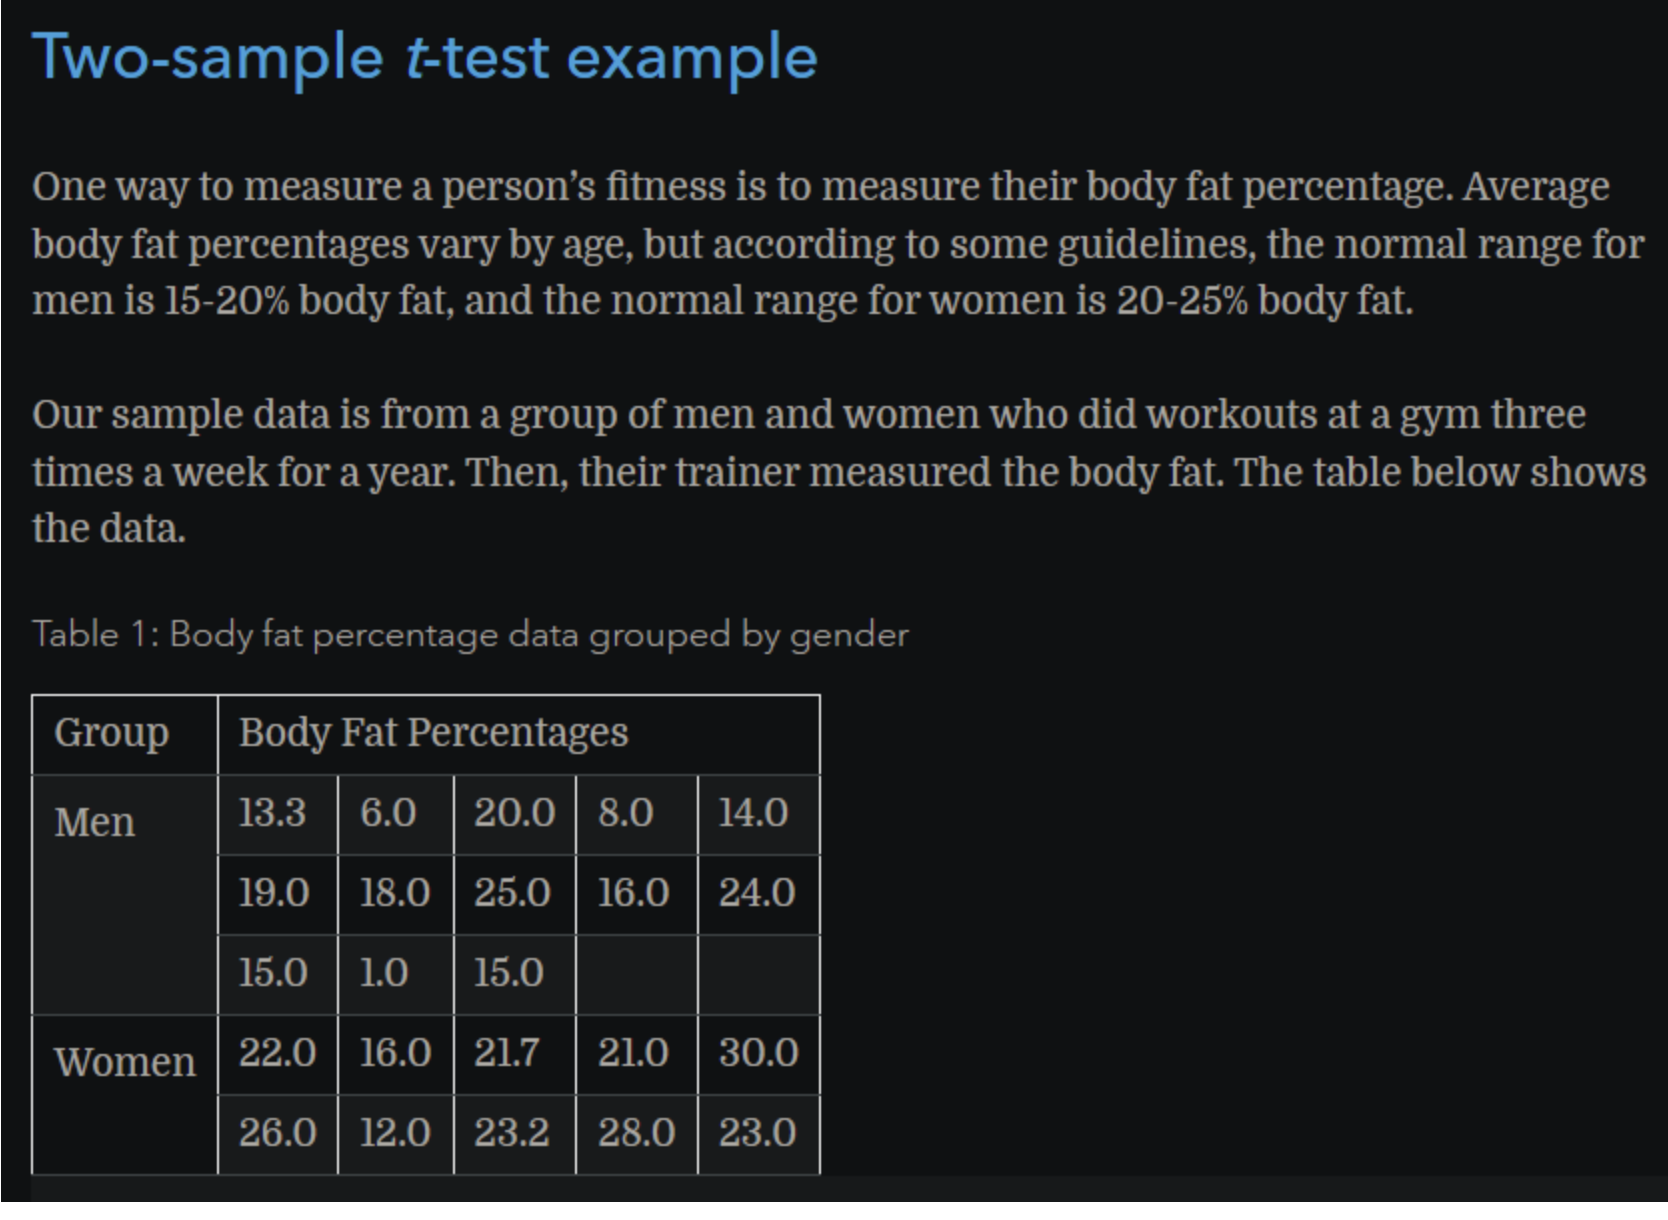

In [53]:
Image (filename = "/Users/sanjaymahto/Task/Screenshot 2024-08-25 at 7.58.28 PM.png")

In [54]:
men = pd.Series([13.3,6.0,20.0,8.0,14.0,19.0,18.0,25.0,16.0,24.0,15.0,1.0,15.0])
women = pd.Series([22.0,16.0,21.7,21.0,30.0,26.0,12.0,23.2,28.0,23.0])

In [57]:
diff_of_mean = np.round(women.mean() - men.mean(), 2)
diff_of_mean

7.34

In [59]:
pooled_variance = (((women.count() -1)* women.var()) + ((men.count() - 1)*men.var()))/ ((women.count() + men.count())- 2)
np.round(pooled_variance, 2)

38.88

In [ ]:
pooled_standard_deviation = np.round(pooled_variance ** 0.5, 2)